# RL Exercise -
## Snake game using Neural Network
#### by Maxwell Ernst

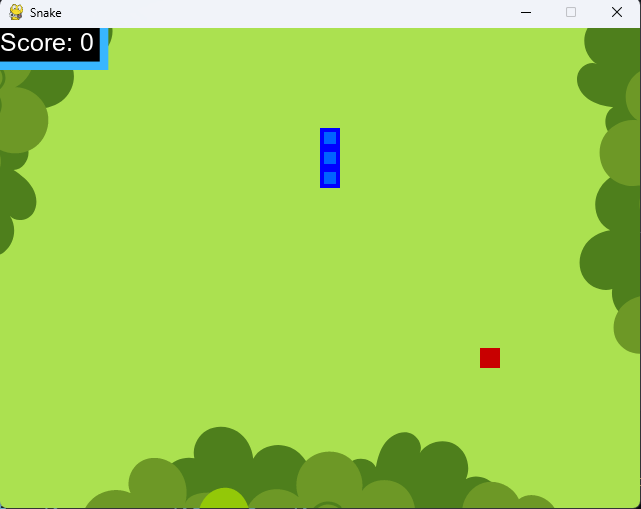

This notebook contains the explanation and analysis of the snake game with re-enforcement learning.

To run the code, run the **agent.py** file.

### Explanation of the code

I followed the this tutorial https://www.youtube.com/watch?v=L8ypSXwyBds, and ended up making some tweaks in the end to make it work since there were quite a few errors. Below I explain the agents code, to help understand what is happening.

Github code: https://github.com/Maxwell103/snake-game-pytorch.git under snake-pygame/ 

##### Agent

The agent uses a neural network, defined in the model module as Linear_QNet, to approximate the Q-values for different game states. The agent interacts with the game environment, represented by the SnakeGameAI class, and uses the QTrainer class to train the neural network.

The key components of the agent are as follows:

- Agent class: Represents the agent that plays the Snake game. It has methods to get the current game state, choose an action, remember the experience, and train the neural network using long and short-term memory.

- get_state() method: Gets the current game state by observing the game environment. It collects information such as the direction of the snake, presence of danger (collision with walls or body), and location of food, and returns it as a numpy array.

- remember() method: Stores the current experience (state, action, reward, next state, and done flag) in the agent's memory. The memory has a maximum capacity defined by MAX_MEMORY.

- train_long_memory() and train_short_memory() methods: Train the neural network using experiences stored in the agent's memory. train_long_memory() is called after each game is completed and trains the network with a batch of experiences from the memory. train_short_memory() is called after each step in the game and trains the network with a single experience.

- get_action() method: Chooses an action for the agent based on the current game state. The agent has an epsilon-greedy exploration-exploitation strategy, where it chooses a random action with probability epsilon and chooses the action with the highest Q-value predicted by the neural network with probability 1-epsilon.

- train() function: The main training loop that runs the game episodes. It interacts with the game environment, gets the current state, chooses an action, performs the action, and updates the neural network and memory accordingly. It also plots the game scores and mean scores over time.

- Linear_QNet class: Represents the neural network architecture used by the agent. It is a simple feedforward neural network with linear layers, and takes the current game state as input and outputs Q-values for different actions. It has methods to save and load the model weights.

- QTrainer class: Represents the trainer for the neural network. It uses the Adam optimizer to update the weights based on the Q-learning loss function. It has a method train_step() that takes the current state, action, reward, next state, and done flag as inputs, calculates the loss, and updates the weights of the neural network.

##### Model

- The QTrainer is used for training the Q-learning Model. The neural network consists connected layers which is set to (11, 256, 3) as mentioned in the tutorial.

- The train_step method takes a state, action, reward, next_state, and done or end of the game as input. Also state and next_state ,the action taken in the current state,the reward received for taking the action, and done is a boolean indicating whether the episode has ended. The method performs the Q-learning update on the model and updates the model's parameters using backpropagation

#### Game and helper

- Contains the game code which is modified to be used by the agent and the plotting of the score and mean score of the games played.


## Initial run

Below is a chart showing the number of games played on the x-axis and the Score on the y-axis. The Blue line represents the score for that game and the orange line represents the average score over all games played.

![Alt text](images/Screenshot%202023-04-15%20005406.png)

From the initial run I noticed there are some issues, the training is very slow and the agent seems to fail alot.

### Fixed an error in  the model

![Alt text](images/Screenshot%202023-04-15%20003146.png)

![Alt text](images/Screenshot%202023-04-15%20001305.png)

##### Highest score for over 250 games

![Alt text](images/Screenshot%202023-04-15%20145437.png)

Over 250 games the average score is around 20. I was able to fix some bugs in the code where some variables werent being used and there were something wrong with the long_term_memory class. 

## Hyperparameter tuning

In this chapter I will play around with some hyperparamters too see how they affect the results.

Over 80 games I get the results below with an average score of 4.9

![Alt text](images/plot_firsttune.gif)

the average score for the first about 100 games is much higher than before. This shows that the model is performing better.

![Alt text](images/plot_04_21_2023.gif)

### Learning rate

- changing the learning rate from 0.001 to 0.0001. 

The learning rate determines how much the weights of the model are adjusted during each iteration of the training process. Meaning the learning rate is slower but may improve the results. If the learning rate is decreased too much than it may cause the model to take longer to converge and even get stuck with a suboptimal result.


After training, I immediately noticed that the snake is taking much longer to go for the food. Its making very repetitive movements compared to before where it would do more random movements. Also it hasnt reached a score of higher than 1 in 60 games.

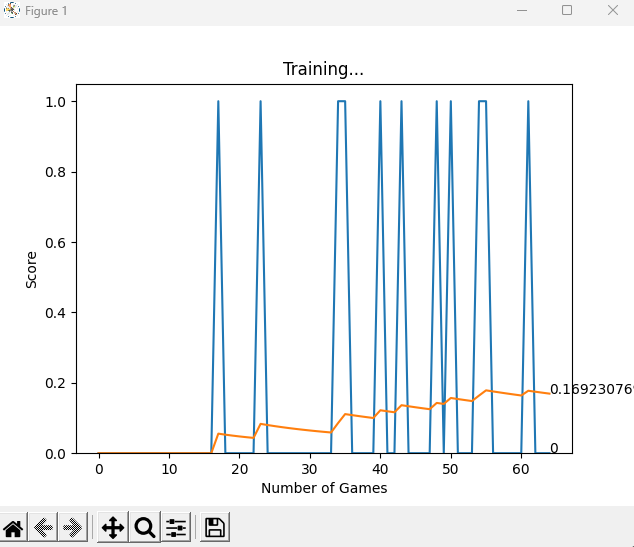

At game 100 the results are :

Game: 100  ,Score: 1  ,Record: 6  ,Total Score: 57  ,Mean Score: 0.57

![Alt text](images/plot_learningrate.gif)

Game: 200  ,Score: 1  ,Record: 38  ,Total Score: 741  ,Mean Score: 3.705

Game: 300  ,Score: 5  ,Record: 38  ,Total Score: 2070  ,Mean Score: 6.9

Conclusion: Decreasing the learning rate makes the training process longer to get good results. In the beggining of the training the agent was takking a long time to get the food. There seem to be a lot of high scores and low scores, not really as consistent as before.

### Discount Rate

- Changing the discount rate from 0.9 to 0.99

A discount rate of 0 means that the agent only cares about maximizing the immediate reward, while a discount rate of 1 means that the agent is willing to trade off immediate rewards for future rewards.

- Game: 100  ,Score: 29  ,Record: 36  ,Total Score: 203  ,Mean Score: 2.03
- Game: 200  ,Score: 37  ,Record: 67  ,Total Score: 3336  ,Mean Score: 16.68
- Game: 300  ,Score: 25  ,Record: 78  ,Total Score: 6740  ,Mean Score: 22.466666666666665
- Game: 400  ,Score: 20  ,Record: 78  ,Total Score: 10040  ,Mean Score: 25.1

![Alt text](images/plot_discount_rate.gif)

- Changing the discount rate from 0.9 to 0.8

- Game: 100  ,Score: 49  ,Record: 49  ,Total Score: 421  ,Mean Score: 4.21
- Game: 200  ,Score: 25  ,Record: 62  ,Total Score: 3619  ,Mean Score: 18.095
- Game: 300  ,Score: 36  ,Record: 64  ,Total Score: 6659  ,Mean Score: 22.196666666666665

![Alt text](images/plot_discount_rate_2.gif)

Game 100 had a much higher average score than before. When it got to game 200 it starts to follow the same trend as earlier runs. There were more lower scores than before too. To conclude the agent learnt the objective of the game faster in 100 games but after 200 to 300 games the results are similar to before. Dropping the discount rate made the agent go more for the immediate reward which shows in the first 100 games.

#### Batch Size

- Increasing the batch size from 1000 to 1500.

- Game: 100  ,Score: 37  ,Record: 38  ,Total Score: 287  ,Mean Score: 2.87
- Game: 200  ,Score: 31  ,Record: 72  ,Total Score: 3600  ,Mean Score: 18.0
- Game: 300  ,Score: 23  ,Record: 72  ,Total Score: 6673  ,Mean Score: 22.243333333333332
- Game: 400  ,Score: 41  ,Record: 75  ,Total Score: 9845  ,Mean Score: 24.6125
- Game: 500  ,Score: 33  ,Record: 75  ,Total Score: 13157  ,Mean Score: 26.314

![Alt text](images/plot_batchsize.gif)

Increasing the batchsize by 500 didn't seem to have a big impact on the results. The mean scores are quite similar to previous runs.

#### Memory

Increasing the memory should get better results.

- Game: 100  ,Score: 35  ,Record: 51  ,Total Score: 840  ,Mean Score: 8.4
- Game: 200  ,Score: 18  ,Record: 81  ,Total Score: 4117  ,Mean Score: 20.585
- Game: 300  ,Score: 67  ,Record: 81  ,Total Score: 7560  ,Mean Score: 25.2

![Alt text](images/plot_memory.gif)

Increasing the memory had better results than before. This was expected, the mean score was higher at game 100 but than after game 200 the trend follows the same pattern as before.

### Conclusion

Overall this was a great learning experience, I experimented with some paramters and could see in action how they affect the results. I struggled in beggining with the assignment but I am pleased with what I have in the end.